In [100]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#importing file
df = pd.read_csv(r"C:\Users\pedro\Desktop\Ironhack\learningSet.txt")

In [103]:
#numerical features
numerical = df.select_dtypes(include=np.number)
numerical

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0.0,0.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,NaN,0,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,NaN,0,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [104]:
#checking null values
def null_percentage(df):
    total_null = df.isnull().sum()
    total_rows = len(df)
    percentage_null = (total_null / total_rows) * 100
    null_df = pd.DataFrame({
        'Total Null Values': total_null,
        'Percentage Null': percentage_null
    })
    
    null_df = null_df.sort_values(by='Percentage Null', ascending=False)
    return null_df

null_percentages = null_percentage(numerical)
null_percentages

,Total Null Values,Percentage Null
RDATE_5,95403,99.990567
RAMNT_5,95403,99.990567
RDATE_3,95170,99.746363
RAMNT_3,95170,99.746363
RDATE_4,95131,99.705488
...,...,...
HUPA7,0,0.000000
HUPA6,0,0.000000
HUPA5,0,0.000000
HUPA4,0,0.000000


In [105]:
#checking null values
null_percentages = null_percentage(df)
null_percentages[null_percentages.index.isin(['ADI','DMA','MSA','WEALTH1','GEOCODE2'])]

,Total Null Values,Percentage Null
WEALTH1,44732,46.882992
MSA,132,0.138347
ADI,132,0.138347
DMA,132,0.138347
GEOCODE2,132,0.138347


In [106]:
#WEALTH1 has 47% null values so we drop it
df = df.drop(["WEALTH1"], axis = 1)

In [107]:
df['GEOCODE2'].value_counts()

GEOCODE2
A    34484
B    28505
D    16580
C    15524
       187
Name: count, dtype: int64

In [108]:
#only 0.14% of null values, so replacing by mode (A)
df["GEOCODE2"] = df["GEOCODE2"].fillna(df["GEOCODE2"].mode()[0])
df["GEOCODE2"].replace(" ", df["GEOCODE2"].mode()[0], inplace = True) 
df['GEOCODE2'].value_counts()

GEOCODE2
A    34803
B    28505
D    16580
C    15524
Name: count, dtype: int64

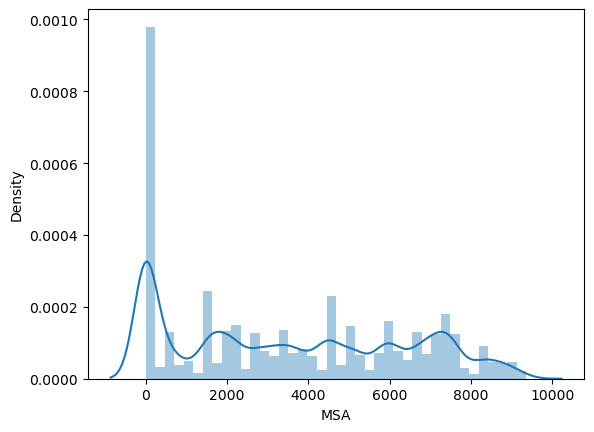

In [109]:
sns.distplot(numerical['MSA'])
plt.show()

In [110]:
#only 0.14% of null values, so replacing by mode (0)
df["MSA"] = df["MSA"].fillna(df["MSA"].mode()[0])
df['MSA'].value_counts()

MSA
0.0       21465
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: count, Length: 298, dtype: int64

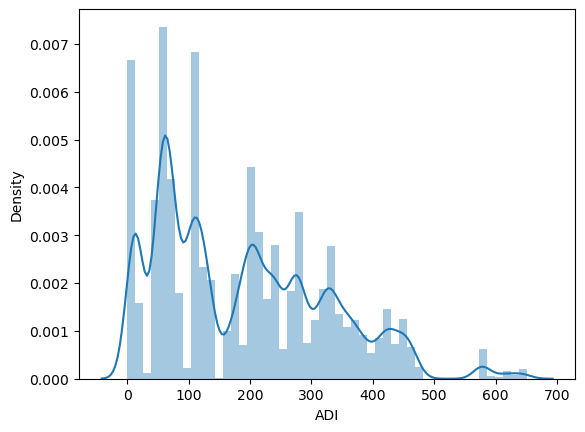

In [111]:
sns.distplot(numerical['ADI'])
plt.show()

In [112]:
#only 0.14% of null values, so replacing by mode (13)
df["ADI"] = df["ADI"].fillna(df["ADI"].mode()[0])
df['ADI'].value_counts()

ADI
13.0     7428
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: count, Length: 204, dtype: int64

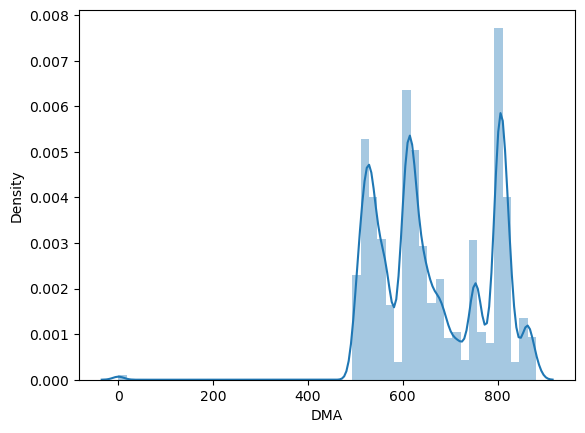

In [113]:
sns.distplot(numerical['DMA'])
plt.show()

In [114]:
#only 0.14% of null values, so replacing by mode (803)
df["DMA"] = df["DMA"].fillna(df["DMA"].mode()[0])
df['DMA'].value_counts()

DMA
803.0    7428
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: count, Length: 206, dtype: int64

In [115]:
#checking again null values
null_percentages = null_percentage(df)
null_percentages[null_percentages.index.isin(['ADI','DMA','MSA','WEALTH1','GEOCODE2'])]

,Total Null Values,Percentage Null
DMA,0,0.0
ADI,0,0.0
MSA,0,0.0
GEOCODE2,0,0.0
